<center><h1><strong>Diseño de una Montaña Rusa</strong></h1></center>  
<center><img src="Montaña Rusa.jpg" width=450 height=270></center>  

### **Sección: 305C1**
### **Estudiantes:**
Manuel Nava 30.822.007  
Juan Wu 30.391.117  
Enrique Gonzalez 31.456.812

<p align="left">Una empresa de parques de atracciones está diseñando una nueva montaña 
rusa y necesita que la trayectoria de la vía sea suave y continúe en todo el recorrido. 
Para esto, solicitan que se realice un modelo matemático que utilice un método de 
trazador cúbico sujeto. Además, requieren que el análisis de la estabilidad 
estructural de la vía se haga utilizando un polinomio de mínimos cuadrados para 
ajustar los datos experimentales obtenidos de las pruebas de tensión y compresión 
del material. El diseño también debe incluir el uso de polinomios ortogonales para 
optimizar la forma de ciertos tramos de la vía y mejorar la experiencia del usuario. 
Finalmente, se necesita resolver un sistema de ecuaciones para determinar las 
fuerzas que actúan en los puntos críticos de la estructura.
</p>

## Paso 1: Método de Trazador Cúbico Sujeto

Obtener los datos desde un archivo "csv"  
  
El trazador cúbico sujeto es una técnica de interpolación que se utiliza para aproximar una función a partir de un conjunto de puntos de control. A diferencia del trazador cúbico natural, el trazador cúbico sujeto incorpora condiciones adicionales en los extremos del intervalo.

$ S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3 $

In [2]:
import csv

def obtenerelarreglodefilas(archivo, filadelarchivo):
    with open(archivo, 'r') as file:
        leo = csv.reader(file)
        rows = list(leo)
        if filadelarchivo > len(rows) or filadelarchivo < 1:
            raise ValueError("Row number out of range")
        return rows[filadelarchivo - 1]
    
archivo = 'datos.csv'
filadelarchivo = 1
xi = obtenerelarreglodefilas(archivo, filadelarchivo)
xi = [float(cadena) for cadena in xi]

def obtengoyi():
    archivo = 'datos.csv'
    filadelarchivo = 2
    yi = obtenerelarreglodefilas(archivo, filadelarchivo)
    yi = [float(cadena) for cadena in yi]
    return yi

print(xi)
yi = obtengoyi()
print(yi)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.5, 0.8, 1.0, 0.9, 1.2, 0.7]


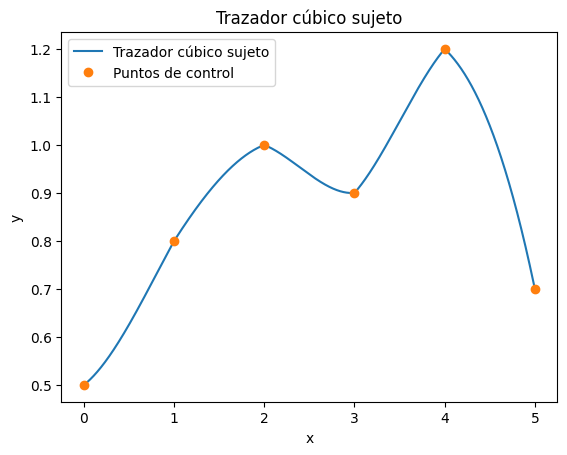

In [5]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt


def traza3sujeto(xi, yi):
    n = len(xi)
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]
    
    #sistema de ecuaciones
    A = np.zeros(shape=(n,n), dtype = float)
    B = np.zeros(n, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*h[0]
    A[0,1] = h[0]
    B[0] = 3*((yi[1]-yi[0])/h[0])

    for i in range(1,n-1,1):
        A[i,i-1] = h[i-1]
        A[i,i] = 2*(h[i-1]+h[i])
        A[i,i+1] = h[i]
        factor21 = (yi[i+1]-yi[i])/h[i]
        factor10 = (yi[i]-yi[i-1])/h[i-1]
        B[i] = 3*(factor21 - factor10)
        
    A[n-1,n-2] = h[n-2]
    A[n-1,n-1] = 2*h[n-2]
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-1] = 3*(factor12 - factor23)
    

    r = np.linalg.solve(A,B)
    for j in range(0,n,1):
        S[j] = r[j]
    

    a = np.zeros(n-1, dtype = float); b = np.zeros(n-1, dtype = float) ; c = np.zeros(n-1, dtype = float) ; d = np.zeros(n-1, dtype = float)
    
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]    

    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]
        
        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)
    
    return(px_tabla)


muestras = 10 

n = len(xi)
px_tabla = traza3sujeto(xi,yi)

xjunto = np.array([])
yjunto = np.array([])

for tramo in range(0, n-1, 1):
    xparagraficar = np.linspace(xi[tramo], xi[tramo+1], muestras)  #aqui la grafica nos da la grafica en tramo por ende tomamos los array y los unimos toodas para graficar todo en una linea suave
    yparagraficar = [px_tabla[tramo].subs('x', x) for x in xparagraficar]
    xjunto = np.concatenate((xjunto, xparagraficar))
    yjunto = np.concatenate((yjunto, yparagraficar))

plt.plot(xjunto, yjunto, label='Trazador cúbico sujeto')
plt.plot(xi, yi, 'o', label='Puntos de control')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trazador cúbico sujeto')
plt.legend()
plt.show()

## Paso 2: Polinomio de Mínimos Cuadrados

Text(0.5, 1.0, 'polinomio minimos cuadrados')

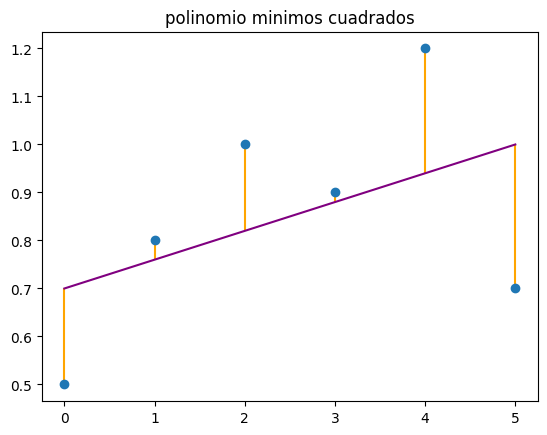

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
lista1 = np.array(xi)
lista2 = np.array(yi)
terminos = len(xi)

promediolista1 = np.mean(xi)
promediolista2 = np.mean(yi)
Ex = np.sum(lista1)
Ey = np.sum(lista2)
Exy = np.sum(lista1*lista2)
Ex2 = np.sum(lista1**2)
Ey2 = np.sum(lista2**2)

coeficienteA1 = (n*Exy-Ex*Ey)/(n*Ex2-Ex**2)
coeficienteA0 = promediolista2 - coeficienteA1*promediolista1

x = sym.Symbol('x')
polinomio = coeficienteA0 + coeficienteA1 *x
fx = sym.lambdify(x,polinomio)
fy = fx(lista1)

for i in range(0, n,1):
    y0 = np.min([yi[i],fy[i]])
    y1 = np.max([yi[i],fy[i]])
    plt.vlines(xi[i],y0,y1, color = 'orange')

plt.plot(xi,yi, 'o', label = '(xi,yi)')
plt.plot(xi,fy, color = "purple", label =polinomio)
plt.title("polinomio minimos cuadrados")

## Paso 3: Polinomios Ortogonales

## Paso 4: Resolución de Ecuaciones

<center><h1><strong>¡Gracias!</strong></h1></center>